# Impact of Air pollution on our lives[ vehicular and industrial poolution taken as key point]

On March 25 2020, the Indian government placed its population of more than 1.3 billion citizens under lockdown in an effort to reduce the spread of the COVID-19 disease. All non-essential shops, markets and places of worship were closed with only essential services including water, electricity and health services remaining active.

Citizens started to experience better air quality so much so that the scenic Dhauladhar Peaks of Himachal Pradesh became visible from neighbouring states. On normal days, these peaks lie hidden behind he film of smog.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
city_day = pd.read_csv('city_day.csv')
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26219 entries, 0 to 26218
Data columns (total 16 columns):
City          26219 non-null object
Date          26219 non-null object
PM2.5         21930 non-null float64
PM10          15453 non-null float64
NO            22986 non-null float64
NO2           23002 non-null float64
NOx           22176 non-null float64
NH3           16372 non-null float64
CO            24258 non-null float64
SO2           22675 non-null float64
O3            22559 non-null float64
Benzene       20932 non-null float64
Toluene       18664 non-null float64
Xylene        9412 non-null float64
AQI           21937 non-null float64
AQI_Bucket    21937 non-null object
dtypes: float64(13), object(3)
memory usage: 3.2+ MB


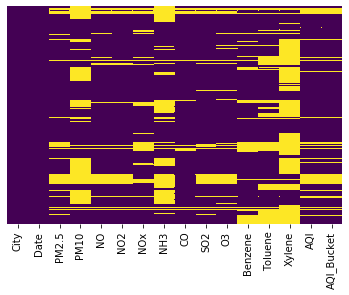

In [7]:
sns.heatmap(city_day.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yellow lines indicates missing information in the data

In [25]:
# missing data 

print ("Your selected dataframe has " + str(city_day.shape[1]) +' columns')

total = city_day.isnull().sum().sort_values(ascending = False)

percent = ((city_day.isnull().sum()/city_day.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.style.background_gradient(cmap='Reds')

Your selected dataframe has 16 columns


,Total,Percent %
Xylene,16807,64.1024
PM10,10766,41.0618
NH3,9847,37.5567
Toluene,7555,28.815
Benzene,5287,20.1648
PM2.5,4289,16.3584
AQI_Bucket,4282,16.3317
AQI,4282,16.3317
NOx,4043,15.4201
O3,3660,13.9593


# It seems that we have a lot of null values in some columns e.g.Xylene and NH3.There could be a couple of reasons for the missing data:
# Station does not have device to capture it.


In [27]:
cities = city_day['City'].value_counts()
print('Total number of cities in the dataset :  ', len(cities))
print(cities.index)


Total number of cities in the dataset :   24
Index(['Mumbai', 'Delhi', 'Lucknow', 'Chennai', 'Ahmedabad', 'Bengaluru',
       'Hyderabad', 'Patna', 'Gurugram', 'Amritsar', 'Jorapokhar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Brajrajnagar', 'Talcher', 'Kolkata',
       'Guwahati', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam',
       'Aizawl'],
      dtype='object')


1.3 Convert to Date Time format
Let's convert the Date column into Date Time format with the help of datetime library

In [28]:
# Convert string to datetime64
city_day['Date'] = pd.to_datetime(city_day['Date'])
#city_day.set_index('Date',inplace=True)


# Visualising yearly data

In [29]:
print(f"The available data is between {city_day['Date'].min()} and {city_day['Date'].max()}")


The available data is between 2015-01-01 00:00:00 and 2020-05-01 00:00:00


#2.1 Combining the Benzene, Toluene and Xylene levels into one column - BTX

In [30]:
city_day['BTX'] = city_day['Benzene']+city_day['Toluene']+city_day['Xylene']
city_day.drop(['Benzene','Toluene','Xylene'],axis=1);

In [31]:
city_day['Particulate_Matter'] = city_day['PM2.5']+city_day['PM10']

In [32]:
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3', 'BTX']

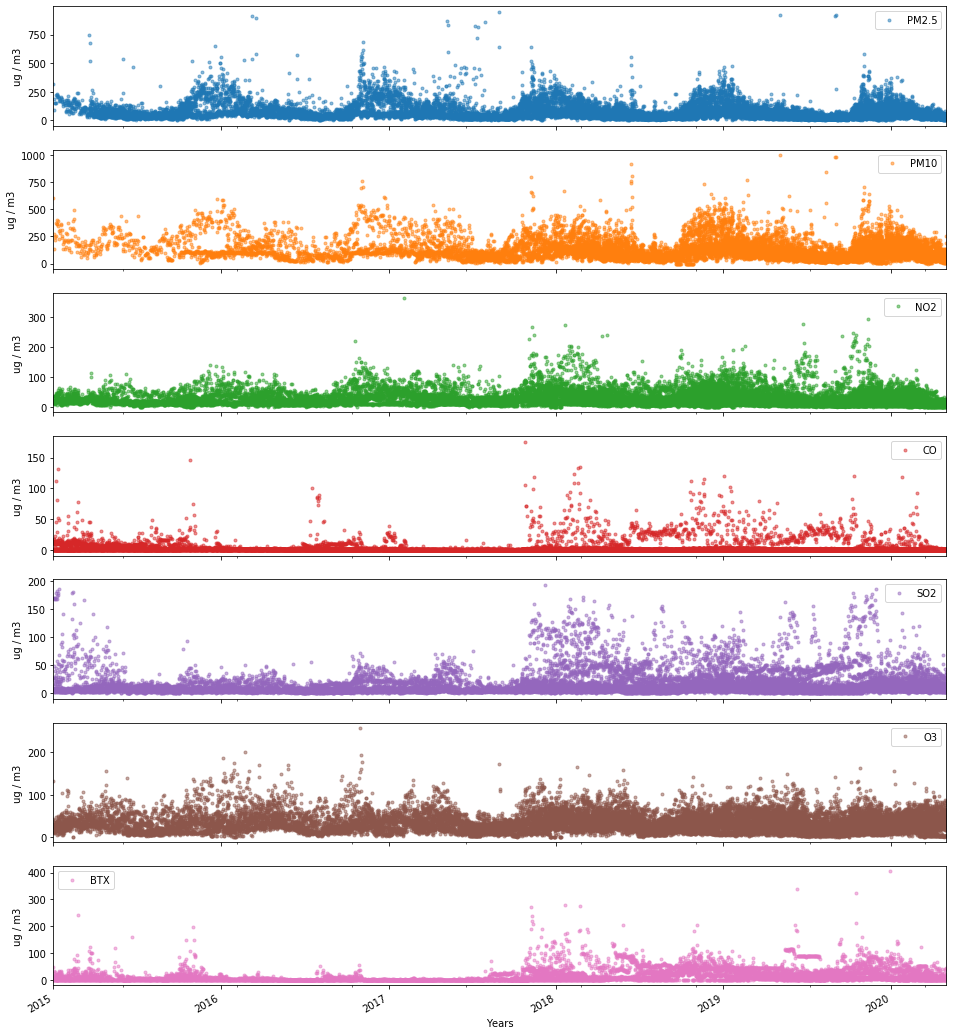

In [33]:
city_day.set_index('Date',inplace=True)
axes = city_day[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')


# PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.
# SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
# This is just an overview. We will have to look deeper to get specific answers.

In [34]:
def trend_plot(dataframe,value):
    
    # Prepare data
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()

    # Draw Plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.boxplot(x='year', y=value, data=df, ax=axes[0])
    sns.pointplot(x='month', y=value, data=df.loc[~df.year.isin([2015, 2020]), :])

    # Set Title
    axes[0].set_title('Year-wise Box Plot \n(The Trend)', fontsize=18); 
    axes[1].set_title('Month-wise Plot \n(The Seasonality)', fontsize=18)
    plt.show()

# Year and Month wise distribution 
Next, let’s further explore the seasonality of our data with box plots. We shall use boxplots to group the data by different time periods and display the distributions for each group. We’ll group the data by year and month. All measurements are in ug / m3.

# NO2 

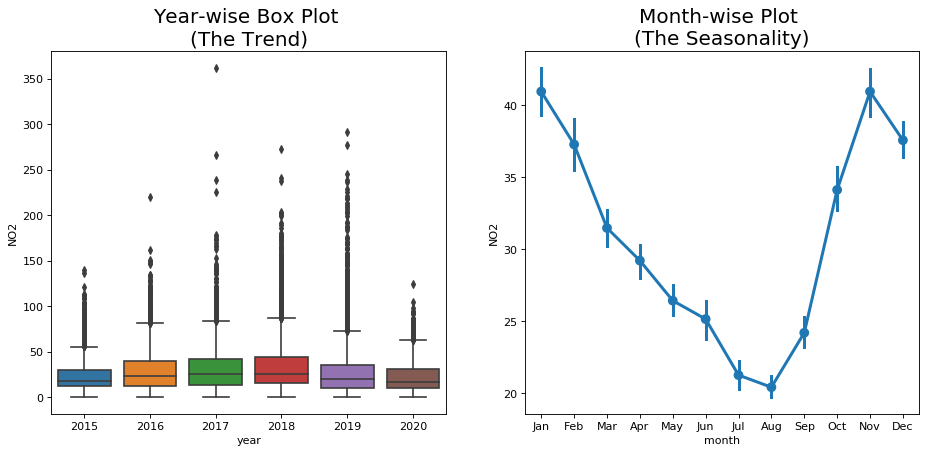

In [35]:
city_day.reset_index(inplace=True)
df = city_day.copy()
value='NO2'
trend_plot(df,value)


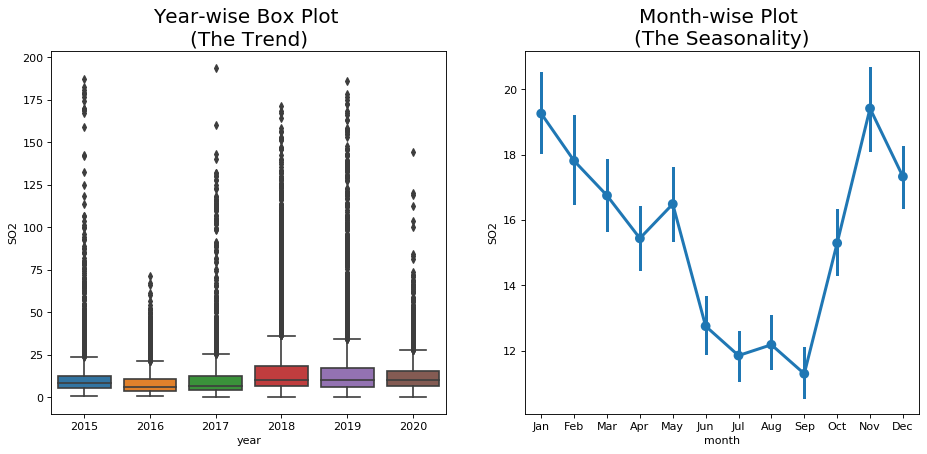

In [44]:
#city_day.reset_index(inplace=True)
df = city_day.copy()
value='SO2'
trend_plot(df,value)

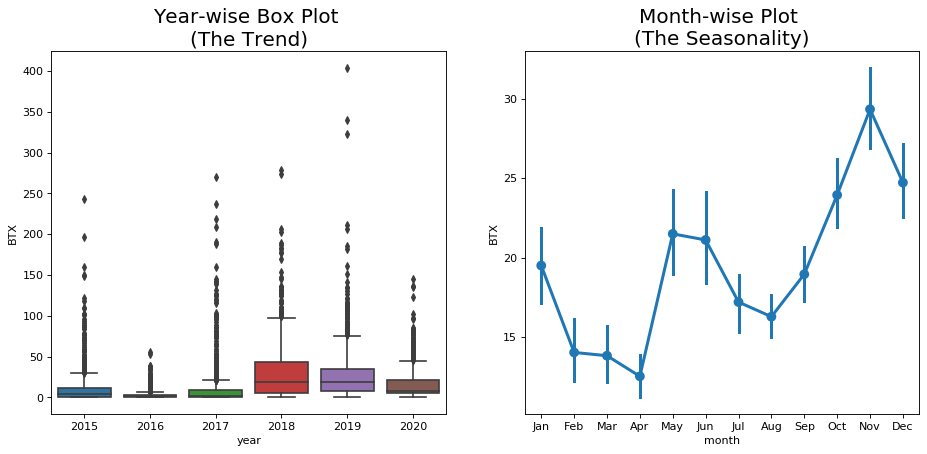

In [45]:
value='BTX'
trend_plot(df,value)

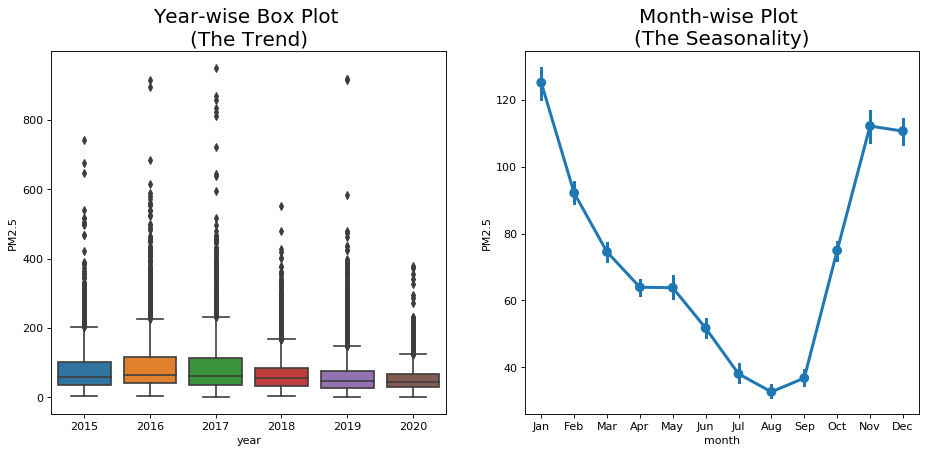

In [46]:
value='PM2.5'
trend_plot(df,value)

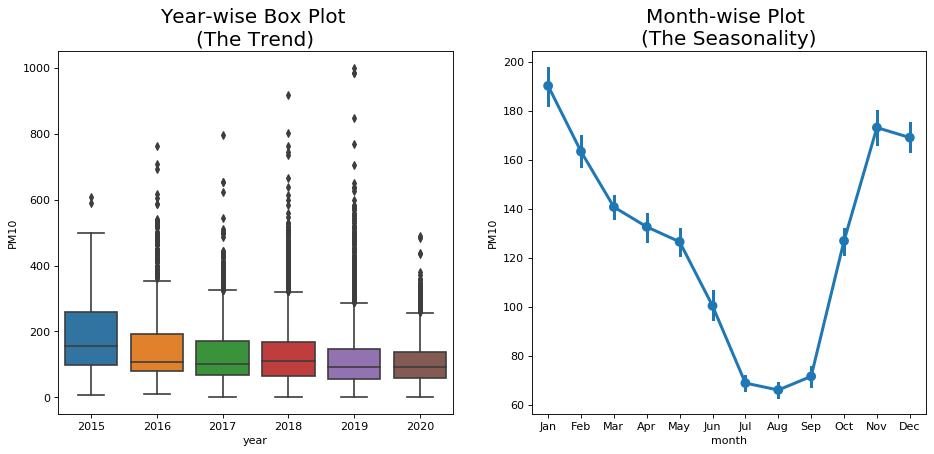

In [47]:
value='PM10'
trend_plot(df,value)

# Well, the pollution in India is comparatively low in Summer than in Winter. However, the recent decline in pollution levels is due to the Lockdown imposed in the country. As a result all factories and other industries are closed since the last week of march.



# There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon sesason sets in during these months.The BTX levels additionally show a major decline around April.
# The pollution level then start rising and reach highest leveks in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.
# SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
# The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.


# AQI for some of the major cities of India 

In [40]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai']

filtered_city_day = city_day[city_day['Date'] >= '2019-01-01']
AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['Date','City','AQI','AQI_Bucket']]
AQI.head()


,Date,City,AQI,AQI_Bucket
1461,2019-01-01,Ahmedabad,1474.0,Severe
1462,2019-01-02,Ahmedabad,1246.0,Severe
1463,2019-01-03,Ahmedabad,1719.0,Severe
1464,2019-01-04,Ahmedabad,1264.0,Severe
1465,2019-01-05,Ahmedabad,1127.0,Severe


# AQI for some of the major cities of India
# The cities that will be the subject of our study are - Ahmedabad, Delhi, Bengaluru, Mumbai,Hyderabad and Chennai

In [41]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')
AQI_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=1,
    #specs=[[{}, {}],
          # [{"colspan": 6}, None]],
    subplot_titles=("Ahmedabad","Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai'))

fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Ahmedabad'],
                    marker=dict(color=AQI_pivot['Ahmedabad'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Bengaluru'],
                    marker=dict(color=AQI_pivot['Bengaluru'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Chennai'],
                    marker=dict(color=AQI_pivot['Chennai'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Delhi'],
                    marker=dict(color=AQI_pivot['Delhi'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Hyderabad'],
                    marker=dict(color=AQI_pivot['Hyderabad'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_pivot.index, y=AQI_pivot['Mumbai'],
                    marker=dict(color=AQI_pivot['Mumbai'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Levels")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=800,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2020-03-25', x1= '2020-03-25'
    )
])

fig.show()

# AQI before and after Lockdown

In [42]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-05-01']

In [43]:
print(AQI_beforeLockdown.mean())
print(AQI_afterLockdown.mean())

City
Ahmedabad    383.776471
Bengaluru     96.023529
Chennai       80.317647
Delhi        246.305882
Hyderabad     94.435294
Mumbai       148.776471
dtype: float64
City
Ahmedabad    127.972973
Bengaluru     68.513514
Chennai       62.189189
Delhi        107.378378
Hyderabad     65.675676
Mumbai        73.972973
dtype: float64


In [22]:

start_date1 = '2019-01-01'
end_date1 = '2019-05-01'

mask1 = (city_day['Date'] >= start_date1) & (city_day['Date']  <= end_date1)
pollutants_filtered_2019 = city_day.loc[mask1]
pollutants_filtered_2019.fillna(method='bfill',inplace=True)
pollutants_filtered_2019.set_index('Date',inplace=True);

start_date2 = '2020-01-01'
end_date2 = '2020-05-01'

mask2 = (city_day['Date'] >= start_date2) & (city_day['Date']  <= end_date2)
pollutants_filtered_2020 = city_day.loc[mask2]
pollutants_filtered_2020.fillna(method='bfill',inplace=True)
pollutants_filtered_2020.set_index('Date',inplace=True);


df1 = pollutants_filtered_2019[pollutants_filtered_2019.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]
df2 = pollutants_filtered_2020[pollutants_filtered_2020.City.isin(cities)][['City','NO2','SO2','PM2.5','CO']]

C:\Users\SMART\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
def pollution_comparison(city):
    """
    Function to plot graph comparing pollutin levels between (Jan-May)2019 and (Jan-May)2020
    
    """
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df1.index, y=df1[df1['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2019 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['NO2'],
                    line=dict(dash='solid',color='green'),name='NO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['SO2'],
                    line=dict(dash='dot',color='red'),name='SO2'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['PM2.5'],
                    line=dict(dash='dashdot',color='dodgerblue'),name='Particulate_Matter'))
    fig.add_trace(go.Scatter(x=df2.index, y=df2[df2['City']==city]['CO'],
                    line=dict(dash='longdashdot'),mode='lines',name='CO'))
    fig.update_layout(title_text=city+' 2020 ',plot_bgcolor='white')
    fig.update_xaxes(rangeslider_visible=True,zeroline=True,zerolinewidth=1, zerolinecolor='Black')
    fig.show()


In [49]:
pollution_comparison('Mumbai')

In [50]:
pollution_comparison('Bengaluru')

# There is a clear trend that pollution level in India falls in the month of July and August. This might be majorly because monsoon sesason sets in during these months.The BTX levels additionally show a major decline around April.
The pollution level then start rising and reach highest leveks in winter months. Again, its during these months that a lot of crop residue burning takes place,especially in northern parts of India.
SO2 level has started increasing after 2017, although it had also seen a sudden rise in 2015 also. The same pattern is also reflected in BTX levels also.
The median values of 2020 are generally less as compared to other years giving us a sense that there might be a reduction on pollution lately.